In [1]:
#1
import random
from collections import Counter

# Generate a list of 100 integers between 90 to 130
int_list = [random.randint(90, 130) for _ in range(100)]

# (i) Function to calculate mean
def calculate_mean(numbers):
    return sum(numbers) / len(numbers)

# (ii) Function to calculate median
def calculate_median(numbers):
    numbers.sort()
    n = len(numbers)
    if n % 2 == 0:
        return (numbers[n//2 - 1] + numbers[n//2]) / 2
    else:
        return numbers[n//2]

# (iii) Function to calculate weighted mean
def calculate_weighted_mean(values, weights):
    return sum(value * weight for value, weight in zip(values, weights)) / sum(weights)

# (iv) Function to calculate geometric mean
def calculate_geometric_mean(numbers):
    product = 1
    for num in numbers:
        product *= num
    return product ** (1 / len(numbers))

# (v) Function to calculate harmonic mean
def calculate_harmonic_mean(numbers):
    return len(numbers) / sum(1 / num for num in numbers)

# (vi) Function to calculate midrange
def calculate_midrange(numbers):
    return (max(numbers) + min(numbers)) / 2

# (vii) Function to calculate trimmed mean
def calculate_trimmed_mean(numbers, percentage):
    trim = int(len(numbers) * percentage)
    trimmed_list = sorted(numbers)[trim:-trim]
    return sum(trimmed_list) / len(trimmed_list)

# Testing the functions
print("Mean:", calculate_mean(int_list))
print("Median:", calculate_median(int_list))
print("Weighted Mean:", calculate_weighted_mean(int_list, [random.random() for _ in range(100)]))
print("Geometric Mean:", calculate_geometric_mean(int_list))
print("Harmonic Mean:", calculate_harmonic_mean(int_list))
print("Midrange:", calculate_midrange(int_list))
print("Trimmed Mean (10% outliers excluded):", calculate_trimmed_mean(int_list, 0.1))


Mean: 107.82
Median: 105.5
Weighted Mean: 108.12838606600987
Geometric Mean: 107.25712166344469
Harmonic Mean: 106.69909599146852
Midrange: 109.5
Trimmed Mean (10% outliers excluded): 107.5125


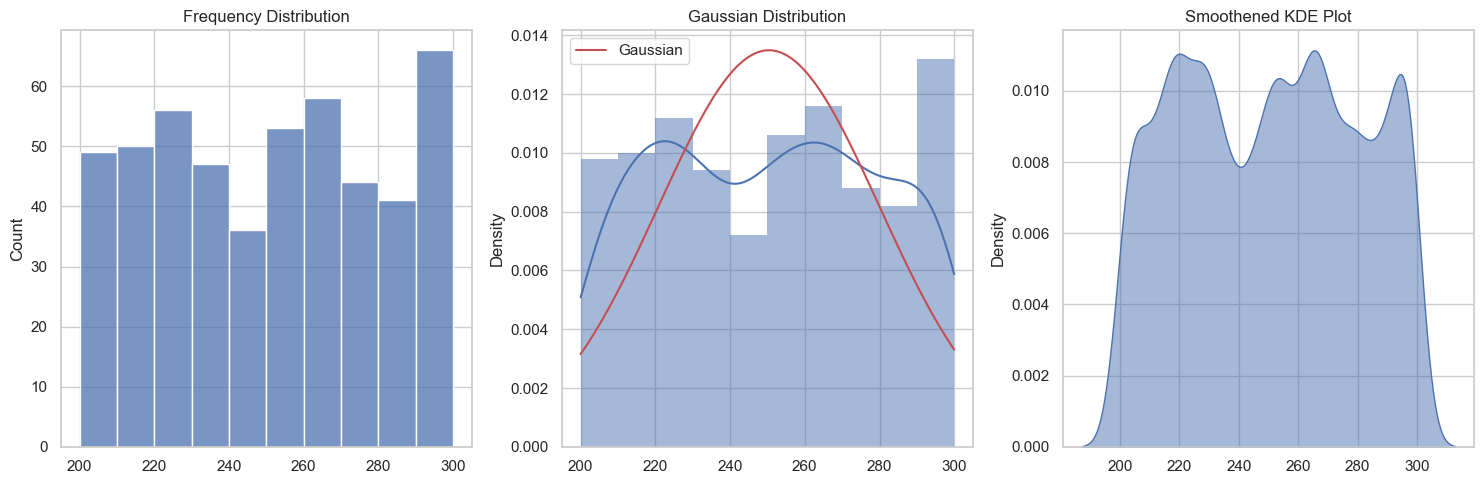

Range: 100
Variance: 874.443596
Standard Deviation: 29.570992475735405
Interquartile Range (IQR): 51.0
Coefficient of Variation: 11.809596113281817
Mean Absolute Deviation (MAD): 25.650856
Quartile Deviation: 25.5
Range-based Coefficient of Dispersion: 39.93642121742187


In [2]:
#2

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gaussian_kde

# Generate a list of 500 integers between 200 to 300
int_list2 = np.random.randint(200, 301, 500)

# (i) Visualization comparison
def compare_visualizations(data):
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(15, 5))
    
    # Frequency distribution
    plt.subplot(1, 3, 1)
    sns.histplot(data, kde=False)
    plt.title("Frequency Distribution")
    
    # Gaussian distribution
    plt.subplot(1, 3, 2)
    sns.histplot(data, kde=True, stat="density", linewidth=0)
    x = np.linspace(min(data), max(data), 100)
    plt.plot(x, norm.pdf(x, np.mean(data), np.std(data)), color='r', label='Gaussian')
    plt.title("Gaussian Distribution")
    plt.legend()
    
    # KDE plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(data, bw_adjust=0.5, fill=True, alpha=0.5)
    plt.title("Smoothened KDE Plot")
    
    plt.tight_layout()
    plt.show()

# (ii) Function to calculate range
def calculate_range(numbers):
    return max(numbers) - min(numbers)

# (iii) Program to find variance and standard deviation
def calculate_variance_and_std(numbers):
    variance = np.var(numbers)
    std_dev = np.std(numbers)
    return variance, std_dev

# (iv) Function to compute interquartile range (IQR)
def calculate_iqr(numbers):
    return np.percentile(numbers, 75) - np.percentile(numbers, 25)

# (v) Program to calculate coefficient of variation
def calculate_coefficient_of_variation(numbers):
    mean = np.mean(numbers)
    std_dev = np.std(numbers)
    return (std_dev / mean) * 100

# (vi) Function to find mean absolute deviation (MAD)
def calculate_mad(numbers):
    mean = np.mean(numbers)
    mad = np.mean(np.abs(numbers - mean))
    return mad

# (vii) Program to calculate quartile deviation
def calculate_quartile_deviation(numbers):
    q3 = np.percentile(numbers, 75)
    q1 = np.percentile(numbers, 25)
    return (q3 - q1) / 2

# (viii) Function to calculate range-based coefficient of dispersion
def calculate_range_based_cod(numbers):
    range_val = max(numbers) - min(numbers)
    mean = np.mean(numbers)
    return (range_val / mean) * 100

# Testing the functions
compare_visualizations(int_list2)
print("Range:", calculate_range(int_list2))
variance, std_dev = calculate_variance_and_std(int_list2)
print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Interquartile Range (IQR):", calculate_iqr(int_list2))
print("Coefficient of Variation:", calculate_coefficient_of_variation(int_list2))
print("Mean Absolute Deviation (MAD):", calculate_mad(int_list2))
print("Quartile Deviation:", calculate_quartile_deviation(int_list2))
print("Range-based Coefficient of Dispersion:", calculate_range_based_cod(int_list2))


In [3]:
class DiscreteRandomVariable:
    def __init__(self, outcomes, probabilities):
        if len(outcomes) != len(probabilities):
            raise ValueError("Number of outcomes and probabilities must be the same")
        self.outcomes = outcomes
        self.probabilities = probabilities

    def expected_value(self):
        return sum(outcome * probability for outcome, probability in zip(self.outcomes, self.probabilities))

    def variance(self):
        expected_value = self.expected_value()
        return sum((outcome - expected_value) ** 2 * probability for outcome, probability in zip(self.outcomes, self.probabilities))


# Example usage:
# Suppose we have a fair six-sided die
outcomes = [1, 2, 3, 4, 5, 6]
probabilities = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# Create a discrete random variable object
die = DiscreteRandomVariable(outcomes, probabilities)

# Calculate and print expected value
print("Expected Value:", die.expected_value())

# Calculate and print variance
print("Variance:", die.variance())


Expected Value: 3.5
Variance: 2.9166666666666665


In [4]:
import numpy as np

class SixSidedDieSimulation:
    def __init__(self, num_rolls):
        self.num_rolls = num_rolls

    def simulate(self):
        rolls = np.random.randint(1, 7, self.num_rolls)
        return rolls

    def expected_value(self):
        rolls = self.simulate()
        return np.mean(rolls)

    def variance(self):
        rolls = self.simulate()
        return np.var(rolls)

# Example usage:
num_rolls = 10000
simulator = SixSidedDieSimulation(num_rolls)

# Simulate the rolling of the die
rolls = simulator.simulate()

# Calculate and print the expected value
expected_value = simulator.expected_value()
print("Expected Value:", expected_value)

# Calculate and print the variance
variance = simulator.variance()
print("Variance:", variance)


Expected Value: 3.4913
Variance: 2.9574789999999997


In [5]:
import numpy as np

def generate_samples_distribution(distribution, params, num_samples):
    
    if distribution == 'binomial':
        samples = np.random.binomial(params['n'], params['p'], num_samples)
    elif distribution == 'poisson':
        samples = np.random.poisson(params['lambda'], num_samples)
    else:
        raise ValueError("Invalid distribution. Supported distributions: 'binomial', 'poisson'")
    
    mean = np.mean(samples)
    variance = np.var(samples)
    
    return mean, variance

# Example usage:
distribution = 'binomial'
params = {'n': 10, 'p': 0.5}
num_samples = 1000

mean, variance = generate_samples_distribution(distribution, params, num_samples)
print("Mean:", mean)
print("Variance:", variance)


Mean: 5.036
Variance: 2.468704


In [6]:
import numpy as np

# Parameters
mean = 0   # Mean of the normal distribution
std_dev = 1   # Standard deviation of the normal distribution
num_samples = 1000   # Number of random samples to generate

# Generate random samples from a Gaussian (normal) distribution
samples = np.random.normal(mean, std_dev, num_samples)

# Compute mean, variance, and standard deviation of the samples
mean_of_samples = np.mean(samples)
variance_of_samples = np.var(samples)
std_dev_of_samples = np.std(samples)

# Print results
print("Mean of the samples:", mean_of_samples)
print("Variance of the samples:", variance_of_samples)
print("Standard deviation of the samples:", std_dev_of_samples)


Mean of the samples: 0.03263041213658348
Variance of the samples: 0.9592892735021529
Standard deviation of the samples: 0.9794331388625529


Skewness of 'total_bill': 1.1332130376158205
Skewness of 'tip': 1.4654510370979401
Nature of skewness of 'total_bill': Positive skewness
Nature of skewness of 'tip': Positive skewness
Covariance between 'total_bill' and 'tip': 8.323501629224854
Pearson correlation coefficient between 'total_bill' and 'tip': 0.6757341092113648


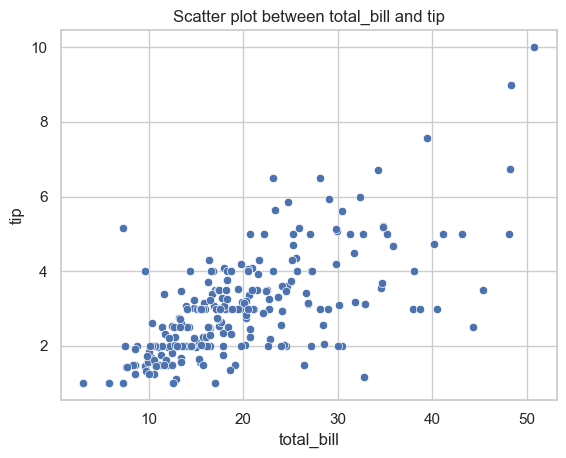

In [7]:
import seaborn as sns
import pandas as pd

# Load the tips dataset
tips = sns.load_dataset("tips")

# (i) Function to calculate skewness
def calculate_skewness(data):
    return data.skew()

# (ii) Program to determine skewness nature
def determine_skewness_nature(skewness):
    if skewness > 0:
        return "Positive skewness"
    elif skewness < 0:
        return "Negative skewness"
    else:
        return "Approximately symmetric"

# (iii) Function to calculate covariance between two columns
def calculate_covariance(data, column1, column2):
    return data[[column1, column2]].cov().iloc[0, 1]

# (iv) Program to calculate Pearson correlation coefficient
def calculate_pearson_correlation(data, column1, column2):
    return data[[column1, column2]].corr().iloc[0, 1]

# (v) Script to visualize correlation between two specific columns using scatter plots
def visualize_correlation(data, column1, column2):
    sns.scatterplot(x=column1, y=column2, data=data)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title("Scatter plot between {} and {}".format(column1, column2))
    plt.show()

# Test the functions and programs
total_bill_skewness = calculate_skewness(tips['total_bill'])
tip_skewness = calculate_skewness(tips['tip'])

print("Skewness of 'total_bill':", total_bill_skewness)
print("Skewness of 'tip':", tip_skewness)

print("Nature of skewness of 'total_bill':", determine_skewness_nature(total_bill_skewness))
print("Nature of skewness of 'tip':", determine_skewness_nature(tip_skewness))

covariance_total_bill_tip = calculate_covariance(tips, 'total_bill', 'tip')
print("Covariance between 'total_bill' and 'tip':", covariance_total_bill_tip)

correlation_total_bill_tip = calculate_pearson_correlation(tips, 'total_bill', 'tip')
print("Pearson correlation coefficient between 'total_bill' and 'tip':", correlation_total_bill_tip)

visualize_correlation(tips, 'total_bill', 'tip')


In [12]:
import numpy as np
import scipy.stats as stats

def calculate_normal_pdf(x, mean, std_dev):
   
    pdf = stats.norm.pdf(x, mean, std_dev)
    return pdf

# Example usage:
x_values = np.linspace(-5, 5, 100)  # Values of x for which to calculate PDF
mean = 0  # Mean of the normal distribution
std_dev = 1  # Standard deviation of the normal distribution

pdf_values = calculate_normal_pdf(x_values, mean, std_dev)
print("PDF values:", pdf_values)


PDF values: [1.48671951e-06 2.45106104e-06 3.99989037e-06 6.46116639e-06
 1.03310066e-05 1.63509589e-05 2.56160812e-05 3.97238224e-05
 6.09759040e-05 9.26476353e-05 1.39341123e-04 2.07440309e-04
 3.05686225e-04 4.45889725e-04 6.43795498e-04 9.20104770e-04
 1.30165384e-03 1.82273110e-03 2.52649578e-03 3.46643792e-03
 4.70779076e-03 6.32877643e-03 8.42153448e-03 1.10925548e-02
 1.44624148e-02 1.86646099e-02 2.38432745e-02 3.01496139e-02
 3.77369231e-02 4.67541424e-02 5.73380051e-02 6.96039584e-02
 8.36361772e-02 9.94771388e-02 1.17117360e-01 1.36486009e-01
 1.57443188e-01 1.79774665e-01 2.03189836e-01 2.27323506e-01
 2.51741947e-01 2.75953371e-01 2.99422683e-01 3.21590023e-01
 3.41892294e-01 3.59786558e-01 3.74773979e-01 3.86422853e-01
 3.94389234e-01 3.98433802e-01 3.98433802e-01 3.94389234e-01
 3.86422853e-01 3.74773979e-01 3.59786558e-01 3.41892294e-01
 3.21590023e-01 2.99422683e-01 2.75953371e-01 2.51741947e-01
 2.27323506e-01 2.03189836e-01 1.79774665e-01 1.57443188e-01
 1.36486009e

In [15]:
import numpy as np
import scipy.stats as stats

def calculate_exponential_cdf(x, scale):
    
    cdf = stats.expon.cdf(x, scale=scale)
    return cdf

# Example usage:
x_values = np.linspace(0, 5, 100)  # Values of x for which to calculate CDF
scale = 1  # Scale parameter (inverse of lambda) of the exponential distribution

cdf_values = calculate_exponential_cdf(x_values, scale)
print("CDF values:", cdf_values)


CDF values: [0.         0.04925087 0.0960761  0.14059514 0.18292158 0.2231634
 0.26142329 0.29779883 0.33238285 0.36526358 0.3965249  0.42624658
 0.45450444 0.48137057 0.50691352 0.53119846 0.55428735 0.57623908
 0.59710968 0.61695238 0.63581781 0.6537541  0.67080701 0.68702005
 0.70243459 0.71708995 0.73102351 0.74427084 0.75686572 0.7688403
 0.78022512 0.79104922 0.80134023 0.8111244  0.82042669 0.82927083
 0.83767939 0.84567382 0.85327452 0.86050088 0.86737133 0.87390341
 0.88011378 0.88601828 0.89163198 0.8969692  0.90204355 0.90686799
 0.91145483 0.91581575 0.9199619  0.92390385 0.92765165 0.93121487
 0.9346026  0.93782348 0.94088572 0.94379715 0.94656519 0.9491969
 0.951699   0.95407787 0.95633957 0.95848989 0.9605343  0.96247802
 0.96432601 0.96608298 0.96775342 0.9693416  0.97085155 0.97228714
 0.97365202 0.97494968 0.97618343 0.97735642 0.97847163 0.97953192
 0.98053999 0.98149842 0.98240964 0.98327598 0.98409965 0.98488276
 0.98562729 0.98633516 0.98700817 0.98764803 0.988256

In [16]:
import numpy as np
import scipy.stats as stats

def calculate_poisson_pmf(k, mu):
   
    pmf = stats.poisson.pmf(k, mu)
    return pmf

# Example usage:
k_values = np.arange(0, 10)  # Values of k for which to calculate PMF
mu = 2  # Mean parameter of the Poisson distribution

pmf_values = calculate_poisson_pmf(k_values, mu)
print("PMF values:", pmf_values)


PMF values: [1.35335283e-01 2.70670566e-01 2.70670566e-01 1.80447044e-01
 9.02235222e-02 3.60894089e-02 1.20298030e-02 3.43708656e-03
 8.59271640e-04 1.90949253e-04]


In [17]:
import numpy as np
from scipy.stats import norm

# Data for old and new layouts
old_layout = np.array([1] * 50 + [0] * 950)
new_layout = np.array([1] * 70 + [0] * 930)

# Sample sizes and proportions
n_old = len(old_layout)
n_new = len(new_layout)
p_old = old_layout.mean()
p_new = new_layout.mean()

# Compute pooled proportion and standard error
p_pooled = (n_old * p_old + n_new * p_new) / (n_old + n_new)
se_pooled = np.sqrt(p_pooled * (1 - p_pooled) * (1 / n_old + 1 / n_new))

# Compute z-score
z_score = (p_new - p_old) / se_pooled

# Calculate p-value
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))  # Two-tailed test

# Print results
print("Z-score:", z_score)
print("P-value:", p_value)


Z-score: 1.883108942886774
P-value: 0.05968560553242619


In [18]:
import numpy as np
from scipy.stats import norm

# Data for exam scores before and after the program
before_program = np.array([75, 80, 85, 70, 90, 78, 92, 88, 82, 87])
after_program = np.array([80, 85, 90, 80, 92, 80, 95, 90, 85, 88])

# Sample sizes and means
n = len(before_program)
mean_before = np.mean(before_program)
mean_after = np.mean(after_program)

# Compute difference in means and standard error
mean_diff = mean_after - mean_before
std_error = np.std(after_program - before_program, ddof=1) / np.sqrt(n)

# Compute z-score
z_score = mean_diff / std_error

# Calculate p-value
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))  # Two-tailed test

# Print results
print("Z-score:", z_score)
print("P-value:", p_value)


Z-score: 4.593190894944664
P-value: 4.365194105293568e-06


In [19]:
import numpy as np
from scipy.stats import norm

# Data for blood pressure measurements before and after the drug
before_drug = np.array([145, 150, 140, 135, 155, 160, 152, 148, 130, 138])
after_drug = np.array([130, 140, 132, 128, 145, 148, 138, 136, 125, 130])

# Sample sizes and means
n = len(before_drug)
mean_before = np.mean(before_drug)
mean_after = np.mean(after_drug)

# Compute difference in means and standard error
mean_diff = mean_after - mean_before
std_error = np.std(after_drug - before_drug, ddof=1) / np.sqrt(n)

# Compute z-score
z_score = mean_diff / std_error

# Calculate p-value
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))  # Two-tailed test

# Print results
print("Z-score:", z_score)
print("P-value:", p_value)


Z-score: -10.049875621120911
P-value: 0.0


In [20]:
import numpy as np
from scipy.stats import norm

response_times = np.array([4.3, 3.8, 5.1, 4.9, 4.7, 4.2, 5.2, 4.5, 4.6, 4.4])

# Population mean
mu = 5

# Sample mean and standard deviation
x_bar = np.mean(response_times)
s = np.std(response_times, ddof=1)

# Sample size
n = len(response_times)

# Z-score
z = (x_bar - mu) / (s / np.sqrt(n))

# P-value
p_value = norm.cdf(z)

# Print results
print("Z-score:", z)
print("P-value:", p_value)


Z-score: -3.184457226042963
P-value: 0.0007251287113068958


In [21]:
import numpy as np
from scipy.stats import ttest_ind

def ab_test(layout_a_clicks, layout_b_clicks):
    # Perform t-test
    t_statistic, p_value = ttest_ind(layout_a_clicks, layout_b_clicks)
    return t_statistic, p_value

# Data
layout_a_clicks = [28, 32, 33, 29, 31, 34, 30, 35, 36, 37]
layout_b_clicks = [40, 41, 38, 42, 39, 44, 43, 41, 45, 47]

# Perform A/B test
t_statistic, p_value = ab_test(layout_a_clicks, layout_b_clicks)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -7.298102156175071
P-value: 8.833437608301987e-07


In [22]:
import numpy as np
from scipy.stats import ttest_ind

existing_drug_levels = [180, 182, 175, 185, 178, 176, 172, 184, 179, 183]
new_drug_levels = [170, 172, 165, 168, 175, 173, 170, 178, 172, 176]

# Perform t-test
t_statistic, p_value = ttest_ind(existing_drug_levels, new_drug_levels)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 4.14048098620866
P-value: 0.0006143398442372505


In [23]:
import numpy as np
from scipy.stats import ttest_rel

pre_intervention_scores = [80, 85, 90, 75, 88, 82, 92, 78, 85, 87]
post_intervention_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]

# Perform paired t-test
t_statistic, p_value = ttest_rel(pre_intervention_scores, post_intervention_scores)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -4.42840883965761
P-value: 0.0016509548165795493


In [24]:
import numpy as np
from scipy.stats import ttest_ind

# Generate synthetic salary data for male and female employees
np.random.seed(0)
male_salaries = np.random.normal(loc=50000, scale=10000, size=20)
female_salaries = np.random.normal(loc=55000, scale=9000, size=20)

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(male_salaries, female_salaries)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 0.06114208969631383
P-value: 0.9515665020676465


In [25]:
import numpy as np
from scipy.stats import ttest_ind

version1_scores = [85, 88, 82, 89, 87, 84, 90, 88, 85, 86, 91, 83, 87, 84, 89, 86, 84, 88, 85, 86, 89, 90, 87, 88, 85]
version2_scores = [80, 78, 83, 81, 79, 82, 76, 80, 78, 81, 77, 82, 80, 79, 82, 79, 80, 81, 79, 82, 79, 78, 80, 81, 82]

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(version1_scores, version2_scores)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 11.325830417646698
P-value: 3.6824250702873965e-15


In [26]:
import numpy as np
from scipy.stats import ttest_ind

branch_a_scores = [4, 5, 3, 4, 5, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 5, 5, 4, 3, 4, 5, 4, 3, 5, 4, 4, 5, 3, 4, 5, 4]
branch_b_scores = [3, 4, 2, 3, 4, 3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 4, 3, 2, 4, 3, 3, 4, 2, 3, 4, 3]

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(branch_a_scores, branch_b_scores)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 5.480077554195743
P-value: 8.895290509945657e-07


In [27]:
import numpy as np
from scipy.stats import chi2_contingency

np.random.seed(0)

age_groups = np.random.choice(['18-30', '31-50', '51+'], size=500)
voter_preferences = np.random.choice(['Candidate A', 'Candidate B'], size=500)

# Create contingency table
observed = np.array([[np.sum((age_groups == '18-30') & (voter_preferences == 'Candidate A')),
                      np.sum((age_groups == '18-30') & (voter_preferences == 'Candidate B'))],
                     [np.sum((age_groups == '31-50') & (voter_preferences == 'Candidate A')),
                      np.sum((age_groups == '31-50') & (voter_preferences == 'Candidate B'))],
                     [np.sum((age_groups == '51+') & (voter_preferences == 'Candidate A')),
                      np.sum((age_groups == '51+') & (voter_preferences == 'Candidate B'))]])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

# Print results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)


Chi-square statistic: 0.8779923945254768
P-value: 0.6446832311860852


In [28]:
import numpy as np
from scipy.stats import chi2_contingency

# Sample data: Product satisfaction levels (rows) vs. Customer regions (columns)
data = np.array([[50, 30, 40, 20], [30, 40, 30, 50], [20, 30, 40, 30]])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(data)

# Print results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)


Chi-square statistic: 27.777056277056275
P-value: 0.00010349448486004387


In [29]:
import numpy as np
from scipy.stats import chi2_contingency

# Sample data: Job performance levels before (rows) and after (columns) training
data = np.array([[50, 30, 20], [30, 40, 30], [20, 30, 40]])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(data)

# Print results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)


Chi-square statistic: 22.161728395061726
P-value: 0.00018609719479882554


In [31]:
import numpy as np
from scipy.stats import f_oneway

# Sample data: Customer satisfaction scores for each product version
standard_scores = [80, 85, 90, 78, 88, 82, 92, 78, 85, 87]
premium_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]
deluxe_scores = [95, 98, 92, 97, 96, 94, 98, 97, 92, 99]

# Perform ANOVA test
f_statistic, p_value = f_oneway(standard_scores, premium_scores, deluxe_scores)

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 27.03556231003039
P-value: 3.578632885734896e-07
